In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv(r"/home/somani/Desktop/GLA/ML_Hackathon/proje/Crop_recommendation.csv")

df = df.dropna()

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])



In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [26]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000
mean,58.157452,42.792668,31.330529,26.229225,75.668593,6.517007,106.069023,11.444712
std,38.550439,22.014420,13.136322,3.589231,15.942541,0.625680,59.962996,6.251057
min,0.000000,5.000000,5.000000,17.220345,24.253862,4.791147,20.211267,1.000000
25%,23.750000,24.000000,20.000000,24.027238,63.551729,6.099201,57.710747,6.000000
50%,56.000000,42.000000,29.000000,26.209103,80.745623,6.499416,96.595059,12.000000
75%,93.000000,59.000000,43.000000,28.618342,89.288116,6.937086,145.638554,17.000000
max,140.000000,95.000000,55.000000,35.474783,99.981876,8.202706,298.560117,21.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1664 non-null   int64  
 1   P            1664 non-null   int64  
 2   K            1664 non-null   int64  
 3   temperature  1664 non-null   float64
 4   humidity     1664 non-null   float64
 5   ph           1664 non-null   float64
 6   rainfall     1664 non-null   float64
 7   label        1664 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 117.0 KB


In [28]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [25]:
df.shape

(1664, 8)

   
Histograms:


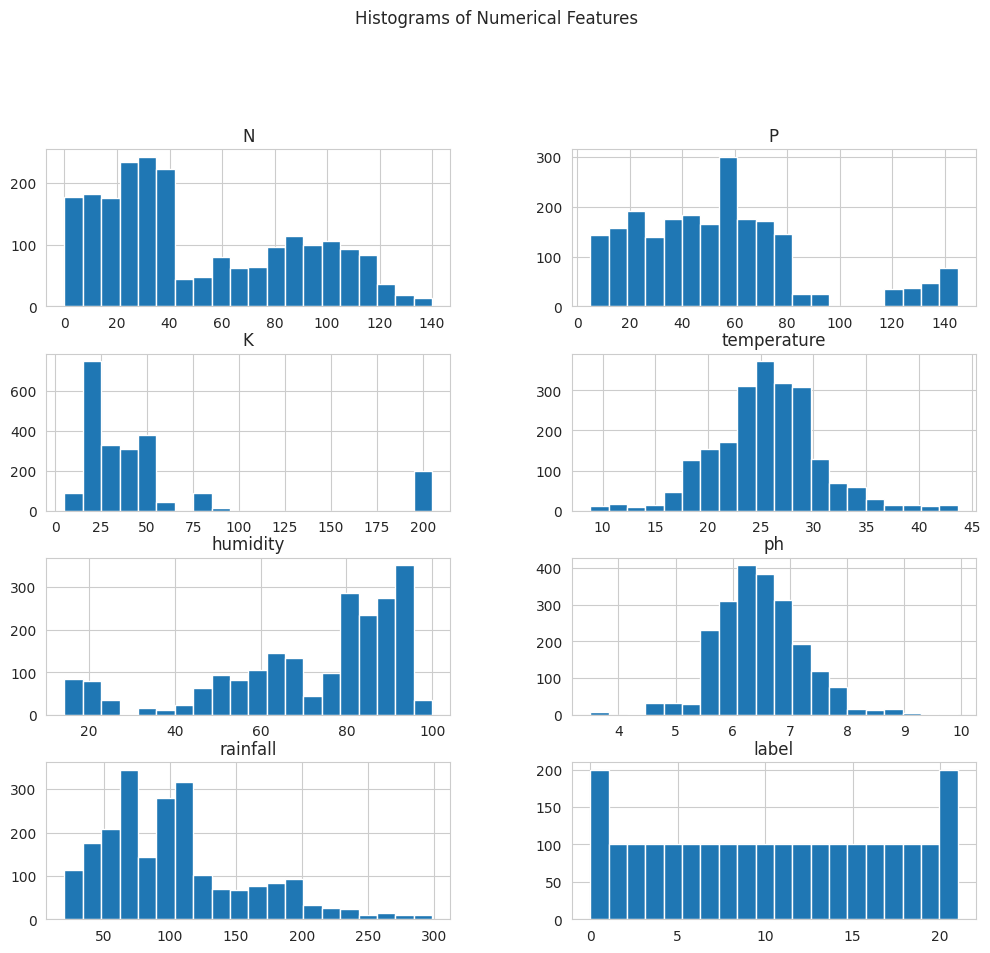

   
   
Box Plots:


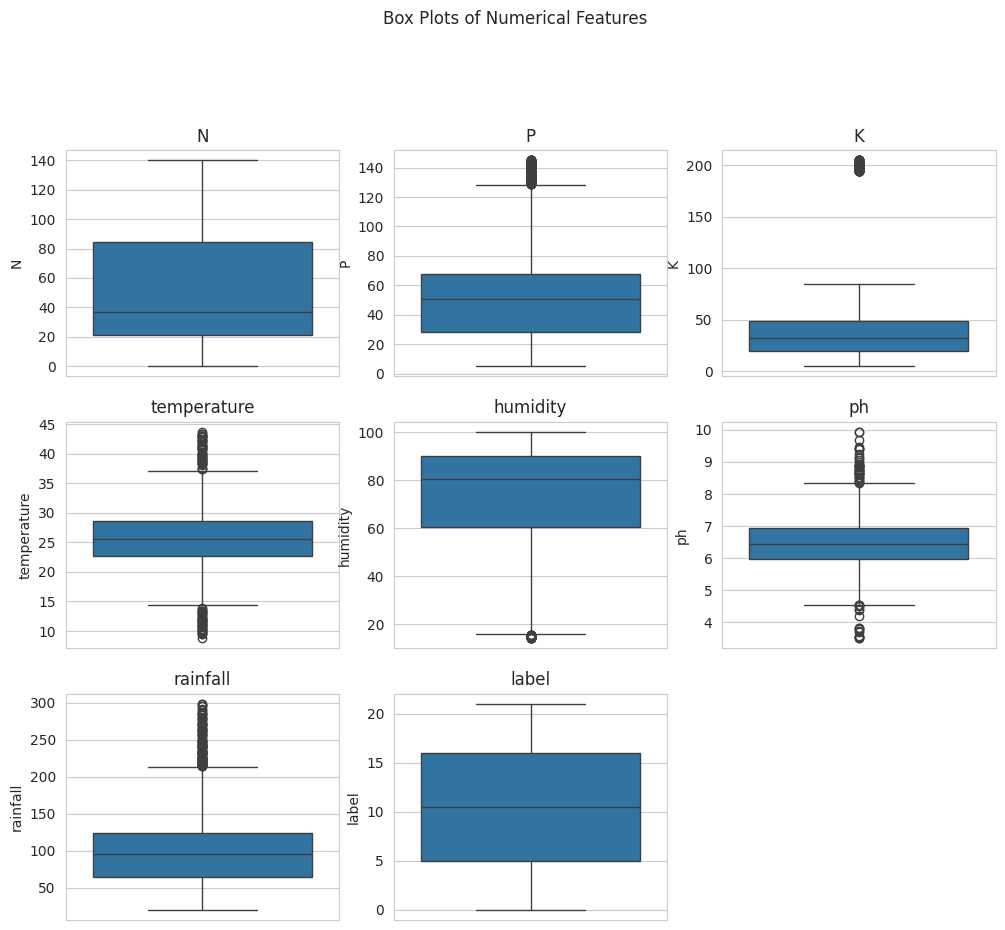

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = df.columns


sns.set_style("whitegrid")


print("   ")
print("Histograms:")
df[numerical_cols].hist(figsize=(12, 10), bins=20, layout=(4,2))
plt.suptitle("Histograms of Numerical Features",y= 1.02)
plt.show()
print("   ")
print("   ")


print("Box Plots:")
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle("Box Plots of Numerical Features",y=1.02)
plt.show()

In [ ]:

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = ['N', 'P', 'K', 'ph', 'humidity', 'temperature']

df = remove_outliers_iqr(df, numerical_cols)
print(f"Dataset shape after outlier removal: {df.shape}")

Dataset shape after outlier removal: (1664, 8)


   
Histograms:


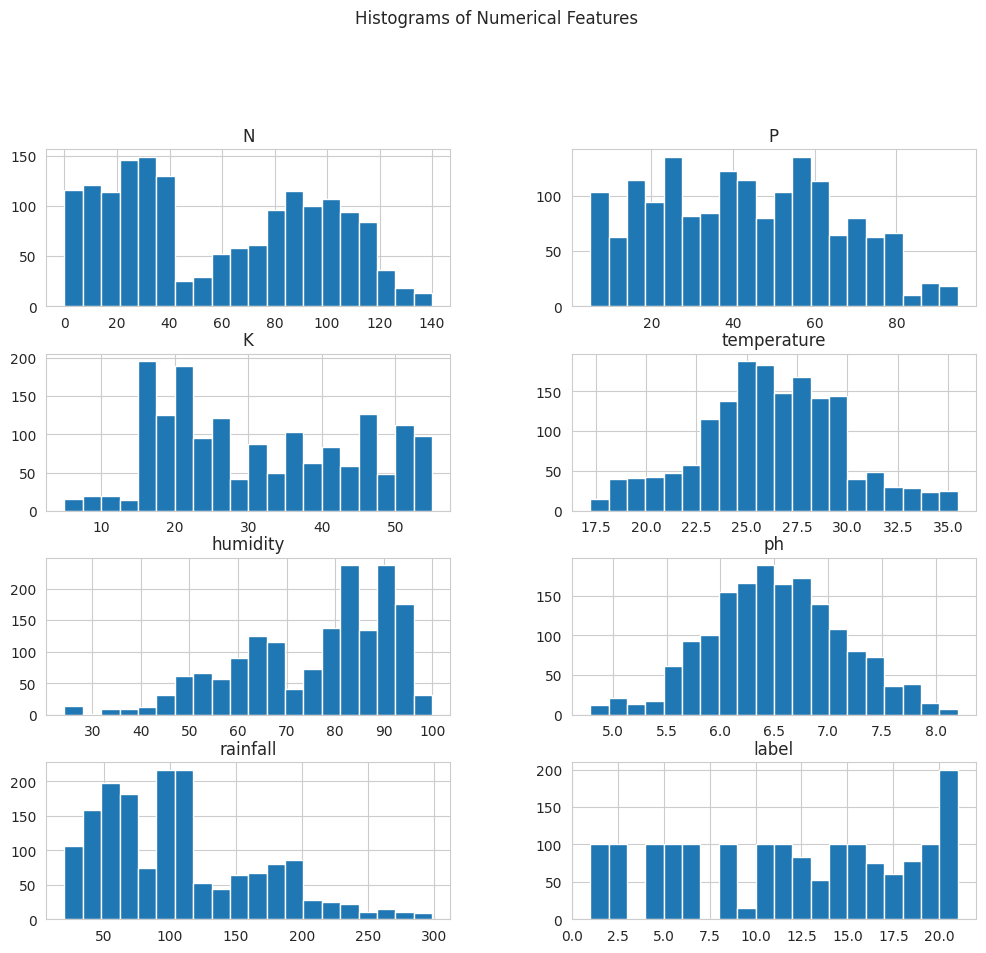

   
   
Box Plots:


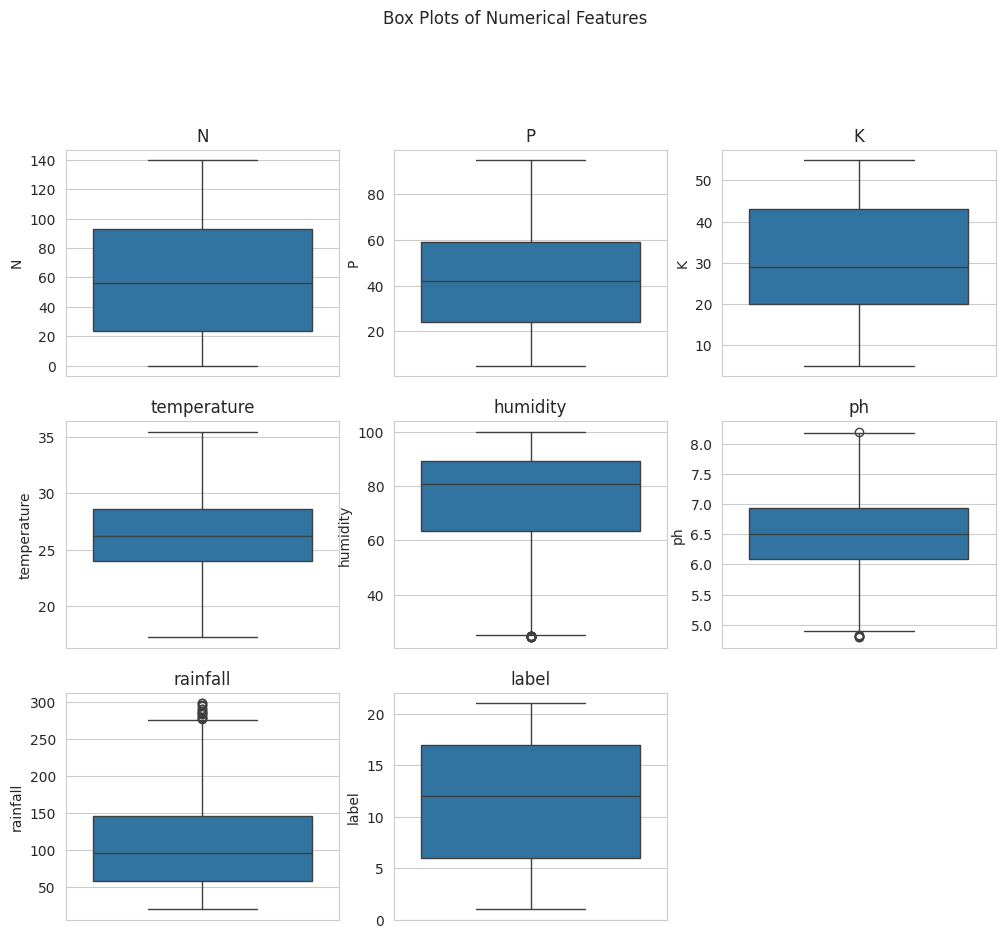

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = df.columns


sns.set_style("whitegrid")


print("   ")
print("Histograms:")
df[numerical_cols].hist(figsize=(12, 10), bins=20, layout=(4,2))
plt.suptitle("Histograms of Numerical Features",y= 1.02)
plt.show()
print("   ")
print("   ")


print("Box Plots:")
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle("Box Plots of Numerical Features",y=1.02)
plt.show()

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['N', 'P', 'K', 'ph','humidity','temperature']])
y = df['label']

<Axes: title={'center': 'Nitrogen Distribution'}>

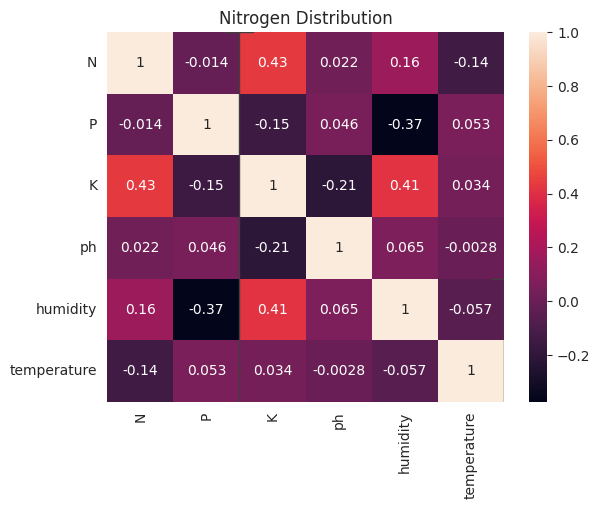

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Nitrogen Distribution")
sns.boxplot(x='label', y='N', data=df)
sns.heatmap(df[['N','P','K','ph','humidity','temperature']].corr(), annot=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
print(f"F1-Score: {f1_score(y_test, preds, average='weighted'):.2f}")

Accuracy: 0.96
F1-Score: 0.96


In [ ]:

import joblib

joblib.dump(rf, 'crop_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import joblib

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_preds):.2f}")
print(f"Decision Tree F1-Score: {f1_score(y_test, dt_preds, average='weighted'):.2f}")

joblib.dump(dt, 'decision_tree_model.pkl')


knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print(f"KNN Accuracy: {accuracy_score(y_test, knn_preds):.2f}")
print(f"KNN F1-Score: {f1_score(y_test, knn_preds, average='weighted'):.2f}")

joblib.dump(knn, 'knn_model.pkl')

Decision Tree Accuracy: 0.94
Decision Tree F1-Score: 0.94
KNN Accuracy: 0.93
KNN F1-Score: 0.93


['knn_model.pkl']